# Import Packages

First Import necessary packages and import the dataset

In [1]:
!pip install pycountry

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry as pc
import matplotlib.ticker as mtick

pd.options.display.max_columns = None

# Now import and display the dataset

In [2]:
## Importing Data
data = pd.read_csv('Bookings.csv')

## Show the first 5 rows of Data
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
## Copy the dataset
df = data.copy()

Dealing with Missing Values
Check if our data contains any missing values


In [4]:
df.shape

(119390, 32)

Looks like we have quite alot of data to work with

### Let's count how many NaN or Null values we have

In [5]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
## Find the missing value, show the total null values for each column and sort it in descending order
df.isnull().sum().sort_values(ascending=False)[:10]

company                   112593
agent                      16340
country                      488
children                       4
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
hotel                          0
previous_cancellations         0
dtype: int64

In the agent and the company column, we have id_number for each agent or company, so for all the missing values, we will just replace it with 0.

In [7]:
## If no id of agent or company is null, just replace it with 0
df[['agent','company']] = df[['agent','company']].fillna(0.0)

Children column contains the count of children, so we will replace all the missing values with the rounded mean value.
And our country column contains country codes representing different countries. It is a categorical feature so I will also replace it with the mode value. The mode value is the value that appears more than any other value. So, in this case, I am replacing it with the country that appears the most often.

In [8]:
## For the missing values in the country column, replace it with mode (value that appears most often)
df['country'].fillna(data.country.mode().to_string(), inplace=True)


## for missing children value, replace it with rounded mean value
df['children'].fillna(round(data.children.mean()), inplace=True)

Lets check again the missing values.

In [9]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

Perfect! now we don’t have any missing value.

There are many rows that have zero guests including adults, children and babies.

In [10]:
list = ['adults', 'children', 'babies']

for i in list:
    print('{} has unique values as {}'.format(i, df[i].unique()))

adults has unique values as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children has unique values as [ 0.  1.  2. 10.  3.]
babies has unique values as [ 0  1  2 10  9]


In [11]:
# wrong entries where adults, childern and babies are '0' at a time
df1 = (df['children']==0) & (df['adults']==0) & (df['babies']==0) 
df[df1]


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [12]:
df[(df.children+df.adults+df.babies)==0].shape

(180, 32)

We have 180 such rows. we will just remove these rows.

In [13]:
## Drop Rows where there is no adult, baby and child
df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

In [14]:
df[df.duplicated()]


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,0.0,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,0.0,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,0.0,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [15]:
df = df.drop_duplicates()

In [16]:
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


# 2. Converting Datatype
Let’s check the datatype of each column in our dataset.


In [17]:
# What datatyes do the columns in the dataset have?
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

We can see different data types for different columns.
There are some columns like children, company, and agent, that are float type but their values are only in integers.
So we will convert them to the integer type.

In [18]:
## convert datatype of these columns from float to integer
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

In [19]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000
mean,0.275238,79.971019,2016.210352,26.835091,15.815832,1.004609,2.623925,1.879365,0.138897,0.010845,0.038565,0.030402,0.184054,0.268497,81.089258,10.984948,0.746291,106.518031,0.084306,0.698934
std,0.446637,86.058683,0.686064,13.669216,8.835545,1.027408,2.039830,0.621724,0.456265,0.113704,0.192556,0.369344,1.733033,0.710633,109.977255,53.956668,10.001001,54.891227,0.281659,0.832051
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.200000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,0.000000,134.100000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Here we can see some outliers.

Lets build boxplots to see it better.

K:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
K:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
K:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
K:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

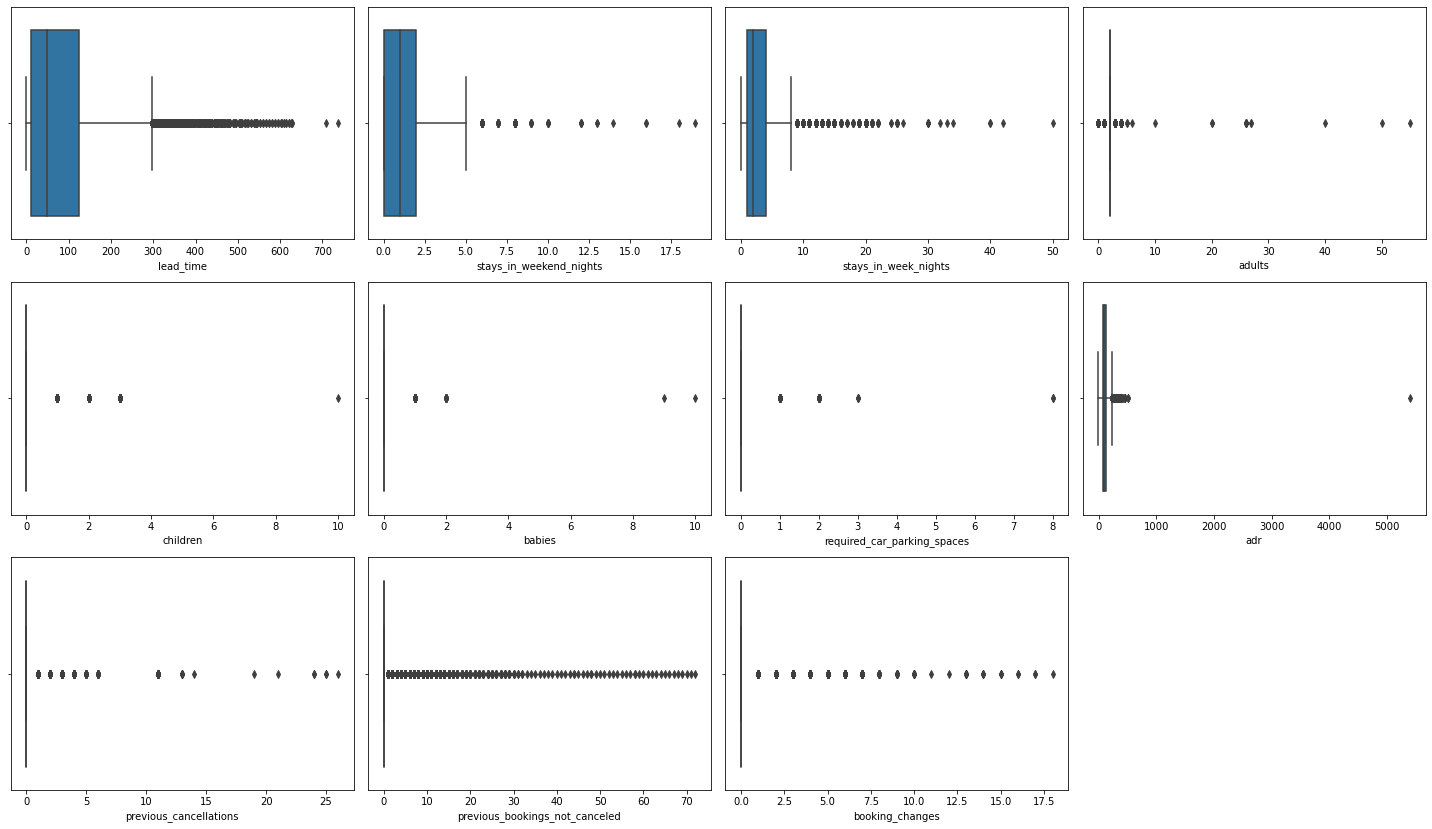

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize=(20,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[column])
  plt.tight_layout()

### OUTLIER DETECTION

In [21]:
# Compute summary statistic of the 'lead_time' column
df['lead_time'].describe()

count    87230.000000
mean        79.971019
std         86.058683
min          0.000000
25%         11.000000
50%         49.000000
75%        125.000000
max        737.000000
Name: lead_time, dtype: float64

<AxesSubplot:ylabel='lead_time'>

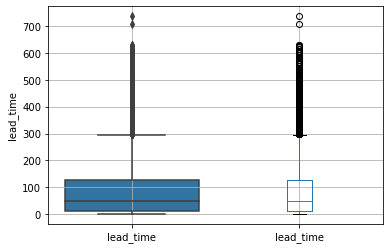

In [22]:
# Visualize the summary statistic of 'lead_time' column using a Whisker plot 
sns.boxplot(y = df['lead_time']) # in seaborn
df.boxplot(column = ['lead_time']) # in pandas
# The black circles are outliers

In [23]:
# What is the interquartile range of 'lead_time'?
Q1, Q3 = df['lead_time'].quantile([.25, .75])
# Interquartile Range = Upper Quartile - Lower Quartile
IQR = Q3 - Q1 
IQR

114.0

In [24]:
# How many outliers does 'lead_time' have?
((df['lead_time'] < (Q1 - 1.5 * IQR)) | (df['lead_time'] > (Q3 + 1.5 * IQR))).sum()

2394

In [25]:
# What is this percentage as compared to the total number of values?
((df['lead_time'] < (Q1 - 1.5 * IQR)) | (df['lead_time'] > (Q3 + 1.5 * IQR))).sum()*100/len(df)

2.7444686461079906

In [26]:
# Compute summary statistic of the 'total_of_special_requests' column
df['total_of_special_requests'].describe()

count    87230.000000
mean         0.698934
std          0.832051
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: total_of_special_requests, dtype: float64

<AxesSubplot:ylabel='total_of_special_requests'>

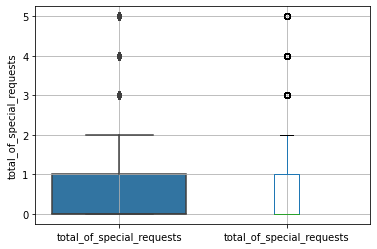

In [27]:
# Visualize the summary statistic of 'total_of_special_requests' column using a Whisker-box plot 
sns.boxplot(y = df['total_of_special_requests']) # in pandas
df.boxplot(column = ['total_of_special_requests']) # in seaborn
# The black circles are outliers

In [28]:
# What is the interquartile range of 'total_of_special_requests'?
Q1, Q3 = df['total_of_special_requests'].quantile([.25, .75])
# Interquartile Range = Upper Quartile - Lower Quartile
IQR = Q3 - Q1 
IQR

1.0

In [29]:
# How many outliers does 'total_of_special_requests' have?
((df['total_of_special_requests'] < (Q1 - 1.5 * IQR)) | (df['total_of_special_requests'] > (Q3 + 1.5 * IQR))).sum()

2670

In [30]:
# What is this percentage as compared to the total number of values?
((df['total_of_special_requests'] < (Q1 - 1.5 * IQR)) | (df['total_of_special_requests'] > (Q3 + 1.5 * IQR))).sum()*100/len(df)

3.0608735526768314

In [31]:
# Compute summary statistic of the 'stays_in_weekend_nights' column
df['stays_in_weekend_nights'].describe()

count    87230.000000
mean         1.004609
std          1.027408
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         19.000000
Name: stays_in_weekend_nights, dtype: float64

<AxesSubplot:ylabel='stays_in_weekend_nights'>

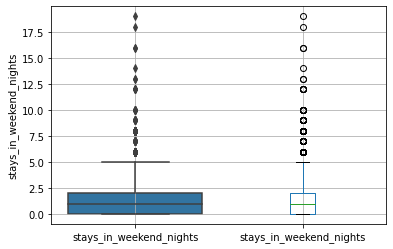

In [32]:
# Visualize the summary statistic of 'stays_in_weekend_nights' column using a Whisker-box plot 
sns.boxplot(y = df['stays_in_weekend_nights']) # in pandas
df.boxplot(column = ['stays_in_weekend_nights']) # in seaborn
# The black circles are outliers

In [33]:
# What is the interquartile range of 'stays_in_weekend_nights'?
Q1, Q3 = df['stays_in_weekend_nights'].quantile([.25, .75])
# Interquartile Range = Upper Quartile - Lower Quartile
IQR = Q3 - Q1 
IQR

2.0

In [34]:
# How many outliers does 'stays_in_weekend_nights' have?
((df['stays_in_weekend_nights'] < (Q1 - 1.5 * IQR)) | (df['stays_in_weekend_nights'] > (Q3 + 1.5 * IQR))).sum()

213

In [35]:
# What is this percentage as compared to the total number of values?
((df['stays_in_weekend_nights'] < (Q1 - 1.5 * IQR)) | (df['stays_in_weekend_nights'] > (Q3 + 1.5 * IQR))).sum()*100/len(df)

0.244182047460736

This is the only one with a low number of outliers So, we can drop these rows

In [36]:
df2=df.copy()

In [37]:
outliers = df[((df['stays_in_weekend_nights'] < (Q1 - 1.5 * IQR)) | (df['stays_in_weekend_nights'] > (Q3 + 1.5 * IQR)))].index
df.drop(outliers, inplace = True)

If we summarise 'stays_in_the_weekend_nights' again

<AxesSubplot:ylabel='stays_in_weekend_nights'>

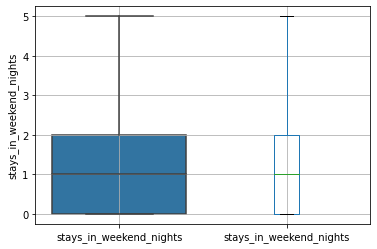

In [38]:
# We can plot it again to see the changes
# Visualize the summary statistic of 'stays_in_weekend_nights' column using a Whisker-box plot 
sns.boxplot(y = df['stays_in_weekend_nights']) # in pandas
df.boxplot(column = ['stays_in_weekend_nights']) # in seaborn
# The black circles are outliers

In [39]:
df['stays_in_weekend_nights'].describe()

count    87017.000000
mean         0.989129
std          0.974399
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: stays_in_weekend_nights, dtype: float64

In [40]:
# Have we removed all the outliers?
((df['stays_in_weekend_nights'] < (Q1 - 1.5 * IQR)) | (df['stays_in_weekend_nights'] > (Q3 + 1.5 * IQR))).sum()

0

Yes, all the outliers have been removed

### DATA VISUALIZATION

### Overview of the type of hotel

Since there are only 2 types (resort or city), we can simply use a barchart or pie chart to show.

([<matplotlib.patches.Wedge at 0x2562a110220>,
 [Text(-1.0333362417793608, -0.3771156472825101, 'City Hotel'),
  Text(1.1272758616049903, 0.4113989934877419, 'Resort Hotel')],
 [Text(-0.5636379500614694, -0.2056994439722782, '61.1%'),
  Text(0.6575775859362443, 0.23998274620118273, '38.9%')])

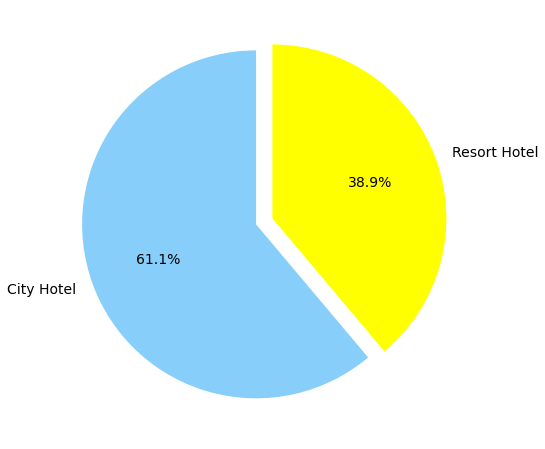

In [41]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = df['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = df['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['lightskyblue','yellow']

# Putting them together. Sizes with the count, explode with the magnitude of separation between pies, colors with the colors, 
# autopct enables you to display the percent value using Python string formatting. .1f% will round off to the tenth place.
# startangle will allow the percentage to rotate counter-clockwise. Lets say we have 4 portions: 10%, 30%, 20% and 40%. The pie will rotate from smallest to the biggest (counter clockwise). 10% -> 20% -> 30% -> 40%
# We have only 2 sections so anglestart does not matter
# textprops will adjust the size of text
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})

What do we see here?
It seems that a huge proportion of hotels was city hotel. Resort hotel tend to be on the expensive side and most people will just stick with city hotel.
Also, resort hotels tend to be appropriate for larger group of people. ## Let's have an overview of the number of people who booked the hotel.

In [42]:
# Looking into adults. 
# Using groupby to group according to hotel types only.
df['adults'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,53201.0,1.882145,0.535525,0.0,2.0,2.0,2.0,4.0
Resort Hotel,33816.0,1.875858,0.737834,1.0,2.0,2.0,2.0,55.0


In [43]:
# Looking into children. 
# Using groupby to group according to hotel types only.
df['children'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,53201.0,0.132216,0.442693,0.0,0.0,0.0,0.0,3.0
Resort Hotel,33816.0,0.149781,0.477076,0.0,0.0,0.0,0.0,10.0


It seems that mean values for adults and children are higher for resort hotels. This means that resort hotels are better choice for large families.

How Many Booking Were Cancelled?
Let’s write the function to get the percentage of different values.

In [44]:
def get_count(series, limit=None):
    
    '''
    INPUT:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

This function takes a series or data frame column and returns the two arrays
x is our unique values
y is the percentage value of each unique value
Now let’s use this function on our is_canceled feature and see the result

In [45]:
x,y = get_count(df['is_canceled'])

In [46]:
x,y

(array([0, 1], dtype=int64), array([72.53640093, 27.46359907]))

is_canceled have two unique values: 1 if booking got canceled, else 0.

Now let’s plot this result. I will write another function to plot the diagram. The good thing about writing function is that we can reuse the code again and again.

In [47]:
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    
    '''
    INPUT:
        x:        Array containing values for x-axis
        y:        Array containing values for y-axis
        x_lable:  String value for x-axis label
        y_lable:  String value for y-axis label
        title:    String value for plot title
        figsize:  tuple value, for figure size
        type:     type of plot (default is bar plot)
        
    OUTPUT:
        Display the plot
    '''
    
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax, sort=False)
        
    
    plt.show()

This function takes two arrays, x, and y and displays the required diagram. The default plot type is a bar plot, but it can also plot the line plot. Optional arguments can be given to display title and labels.

Now let’s call the function

K:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


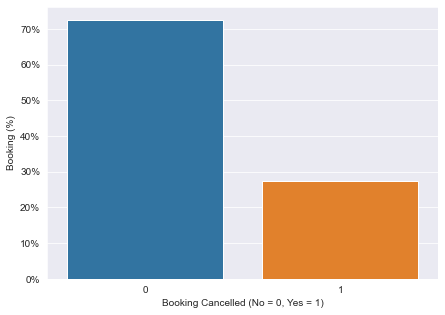

In [48]:
plot(x,y, x_label='Booking Cancelled (No = 0, Yes = 1)', y_label='Booking (%)')

Bookings got canceled 37% of the time. While booking guest did checkd-in (did not cancel the booking ) almost 63% of the time.

For further analysis, We will select only those bookings which did not get canceled

In [49]:
df_not_canceled = df[df['is_canceled'] == 0]

 What is the booking ratio between Resort Hotel and City Hotel?

Let’s answer another question, how many bookings were made for each type of hotel.
We can now reuse the functions that we created earlier. All we have to do is to pass the dataframe column to get_count() function and pass its result (x and y array) to plot function.


K:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


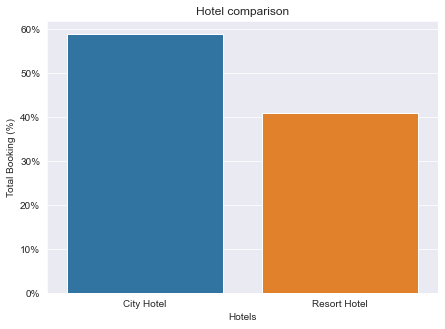

In [50]:
x,y = get_count(df_not_canceled['hotel'])
plot(x,y, x_label='Hotels', y_label='Total Booking (%)', title='Hotel comparison')

More than 60% of the population booked the City hotel

What is the percentage of booking for each year?

K:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


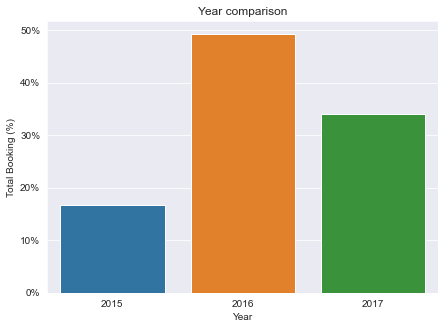

In [51]:
x,y = get_count(df_not_canceled['arrival_date_year'])
plot(x,y, x_label='Year', y_label='Total Booking (%)', title='Year comparison')

More than double bookings were made in 2016, compared to the previous year. But the bookings decreased by almost 15% the next year.

Let’s separate it by the hotel and then plot the diagram. We will change our code to display the countplot.

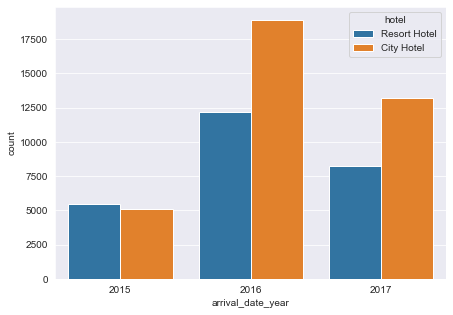

In [52]:
plt.subplots(figsize=(7,5))
sns.countplot(x='arrival_date_year', hue='hotel',  data=df_not_canceled);

Which is the busiest month for hotels?

To answer this question, we will select the arrival_date_month feature and get its value count. Now the resulting data will not be sorted according to month order so we have to sort it. We will make the new list with the names of months in order to sort our data according to this list.

We will display the Lineplot to display the trend.

K:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


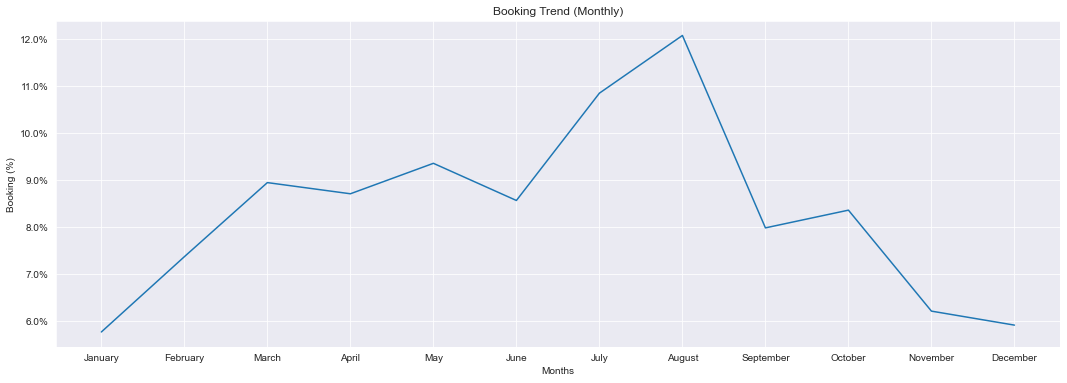

In [53]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

sorted_months = df_not_canceled['arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100


#sns.lineplot(x, y.values)
plot(x, y.values, x_label='Months', y_label='Booking (%)', title='Booking Trend (Monthly)', type='line', figsize=(18,6))


As we can see most bookings were made from July to August. And the least bookings were made at the start and end of the year.

Let’s separate the data for each hotel type and then see the trend.


K:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
K:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


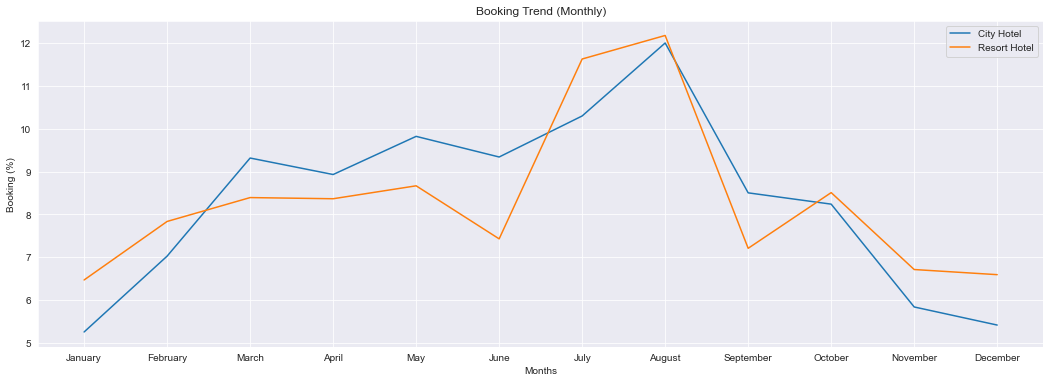

In [54]:
## Order of months
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
             'November', 'December']


## Select only City Hotel
sorted_months = df_not_canceled.loc[df.hotel=='City Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x1 = sorted_months.index
y1 = sorted_months/sorted_months.sum()*100



## Select only Resort Hotel
sorted_months = df_not_canceled.loc[df.hotel=='Resort Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x2 = sorted_months.index
y2 = sorted_months/sorted_months.sum()*100






## Draw the line plot

fig, ax = plt.subplots(figsize=(18,6))

ax.set_xlabel('Months')
ax.set_ylabel('Booking (%)')
ax.set_title('Booking Trend (Monthly)')
sns.lineplot(x1, y1.values, label='City Hotel', sort=False)
sns.lineplot(x1, y2.values, label='Resort Hotel', sort=False)

plt.show()

We can see the trend is kind of similar with a small difference. Resort has more bookings at the start and end of the year, and lower booking in June and September.

From which country most guests come?

To see the country wise comparison plot the country column. In the country column, we have codes for each country like PRT for Portugal

K:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


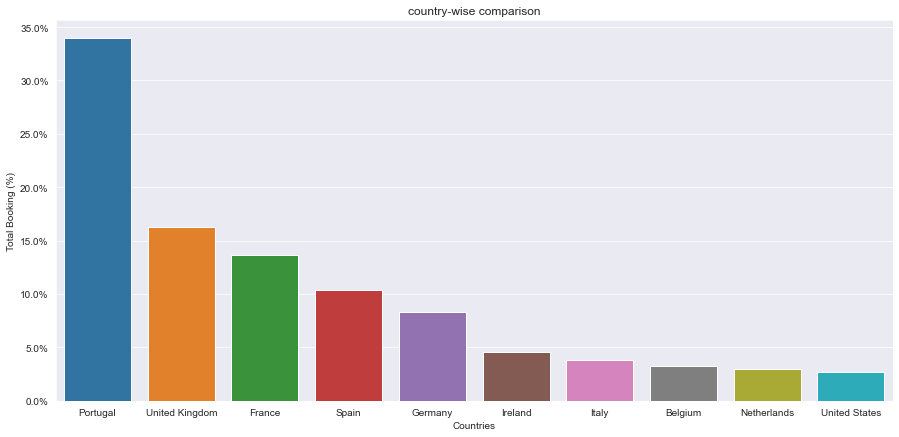

In [55]:
import pycountry as pc

x,y = get_count(df_not_canceled['country'], limit=10)


## For each country code select the country name 
country_name = [pc.countries.get(alpha_3=name).name for name in x]

plot(country_name,y, x_label='Countries', y_label='Total Booking (%)', title='country-wise comparison', figsize=(15,7))


Portugal, UK and France, Spain and Germany are the top countries from most guests come, more than 80% come from these 5 countries.
We have a huge number of visitors from western europe, namely France,UK and Portugal being the highest.
We can instruct the marketing team to target people of this region.

How Long People Stay in the hotel?

K:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


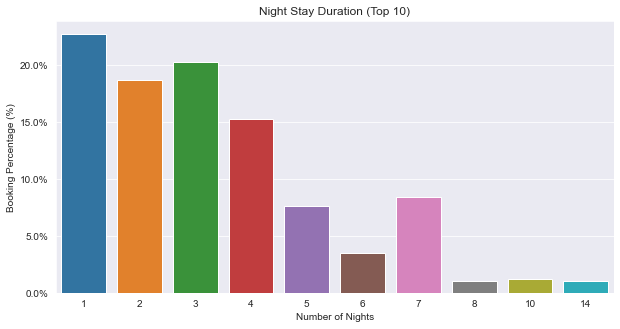

In [56]:
total_nights = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']
x,y = get_count(total_nights, limit=10)

plot(x,y, x_label='Number of Nights', y_label='Booking Percentage (%)', title='Night Stay Duration (Top 10)', figsize=(10,5))


Most people stay for one, two, or three. More than 60% of guests come under these three options.

Let’s see the stay duration trend for each hotel type.

K:\anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
K:\anaconda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


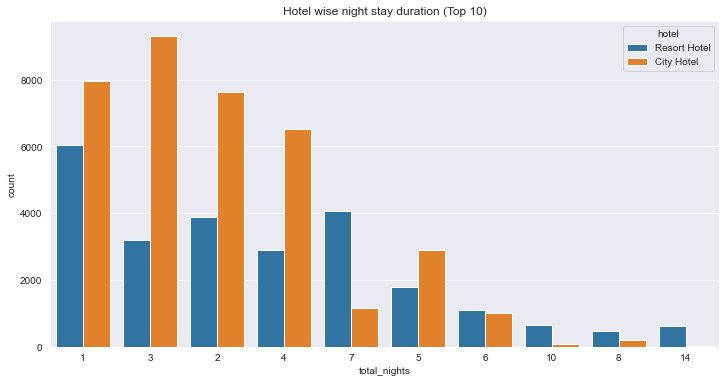

In [57]:
df_not_canceled.loc[:,'total_nights'] = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_nights', hue='hotel', data=df_not_canceled,
              order = df_not_canceled.total_nights.value_counts().iloc[:10].index, ax=ax);

For Resort hotel, the most popular stay duration is three, two, one, and four days respectively.
For City hotel, most popular stay duration is one, two, seven(week), and three respectively

Which was the most booked accommodation type (Single, adult, Family)?

We will divide people staying in the hotel into 3 categories.
Single: 1 Adult only
adult: 2 Adults only
Family or Friends: More than 2 people including adults, children, and babies. (or alternatively, we can call it a group)

K:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


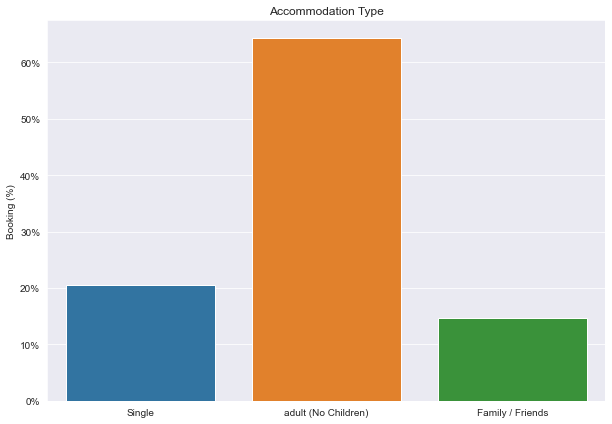

In [58]:
## Select single, couple, multiple adults and family
single   = df_not_canceled[(df_not_canceled.adults==1) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
adult   = df_not_canceled[(df_not_canceled.adults==2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
family   = df_not_canceled[df_not_canceled.adults + df_not_canceled.children + df_not_canceled.babies > 2]


## Make the list of Category names, and their total percentage
names = ['Single', 'adult (No Children)', 'Family / Friends']
count = [single.shape[0],adult.shape[0], family.shape[0]]
count_percent = [x/df_not_canceled.shape[0]*100 for x in count]


## Draw the curve
plot(names,count_percent,  y_label='Booking (%)', title='Accommodation Type', figsize=(10,7))

 2 adults is the most popular accommodation type. So hotels can make plans accordingly

### Market Segment

Lets check the Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

In [59]:
df.market_segment.value_counts(normalize=True)

Online TA        0.591218
Offline TA/TO    0.158578
Direct           0.135112
Groups           0.056368
Corporate        0.048163
Complementary    0.007941
Aviation         0.002597
Undefined        0.000023
Name: market_segment, dtype: float64

K:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


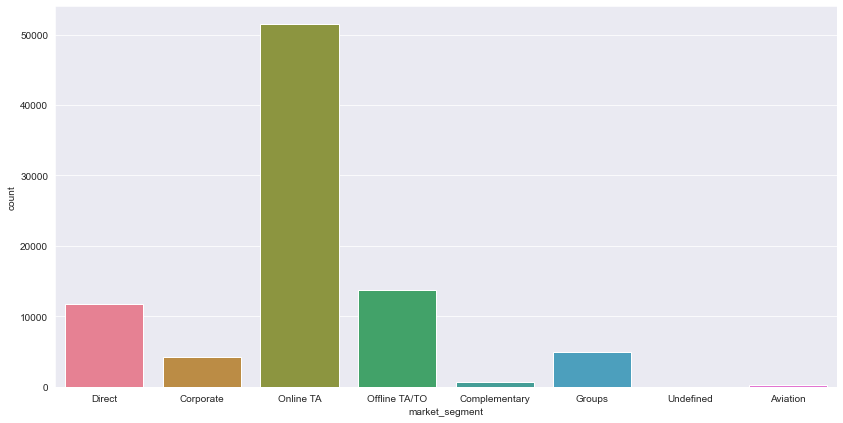

In [60]:
plt.figure(figsize=(14,7))
sns.countplot(df['market_segment'], palette='husl')
plt.show()

### Meal

Type of meal booked. Categories are presented in standard hospitality meal packages:
Undefined/SC — no meal package;
BB — Bed & Breakfast;
HB — Half board (breakfast and one other meal — usually dinner);
FB — Full board (breakfast, lunch and dinner)

In [61]:
df.meal.value_counts(normalize=True)

BB           0.778928
SC           0.107623
HB           0.103727
Undefined    0.005585
FB           0.004137
Name: meal, dtype: float64

K:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


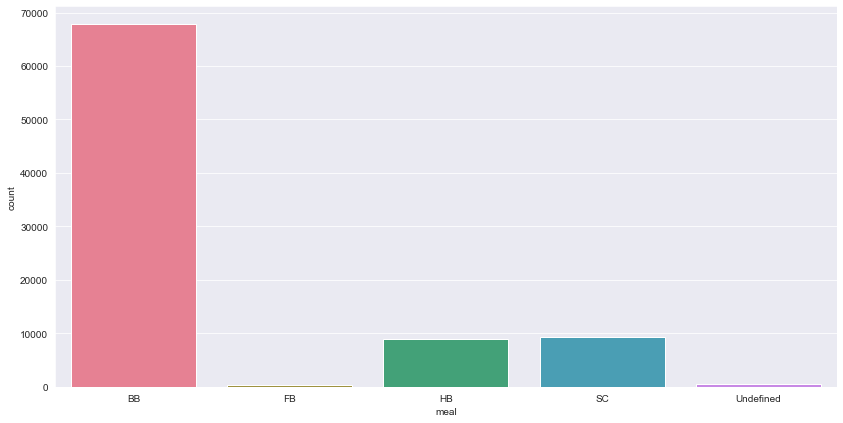

In [62]:
plt.figure(figsize=(14,7))
sns.countplot(df['meal'], palette='husl')
plt.show()

### Customer Type

Type of booking, assuming one of four categories:
Contract — when the booking has an allotment or other type of contract associated to it;
Group — when the booking is associated to a group;
Transient — when the booking is not part of a group or contract, and is not associated to other transient booking;
Transient-party — when the booking is transient, but is associated to at least other transient booking


In [63]:
df.customer_type.value_counts(normalize=True)

Transient          0.823805
Transient-Party    0.134112
Contract           0.035867
Group              0.006217
Name: customer_type, dtype: float64

K:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


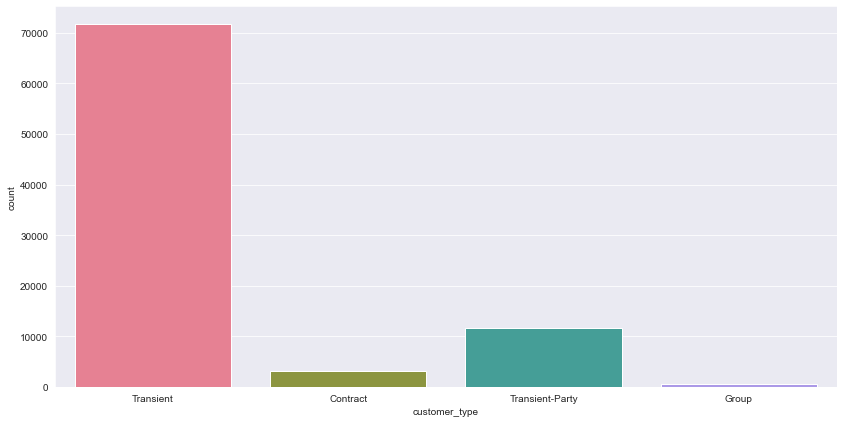

In [64]:
plt.figure(figsize=(14,7))
sns.countplot(df['customer_type'], palette='husl')
plt.show()

Majority of the bookings are transient. This means that the booking is not part of a group or contract. With the ease of booking directly from the website, most people tend to skip the middleman to ensure quick response from their booking.

 ### Reserved Room type
Code of room type reserved. 


In [65]:
df.reserved_room_type.value_counts(normalize=True)

A    0.647299
D    0.199099
E    0.068883
F    0.032350
G    0.023501
B    0.011446
C    0.010504
H    0.006849
L    0.000069
Name: reserved_room_type, dtype: float64

K:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


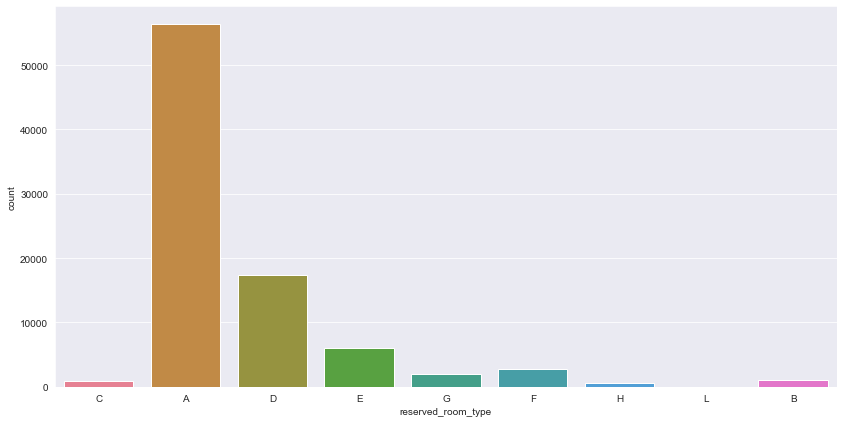

In [66]:
plt.figure(figsize=(14,7))
sns.countplot(df['reserved_room_type'], palette='husl')
plt.show()

 ### Assigned Room type
Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. 

In [67]:
df.assigned_room_type.value_counts(normalize=True)

A    0.530793
D    0.257030
E    0.082179
F    0.041590
G    0.028581
C    0.024800
B    0.020801
H    0.008113
I    0.003999
K    0.002103
L    0.000011
Name: assigned_room_type, dtype: float64

K:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


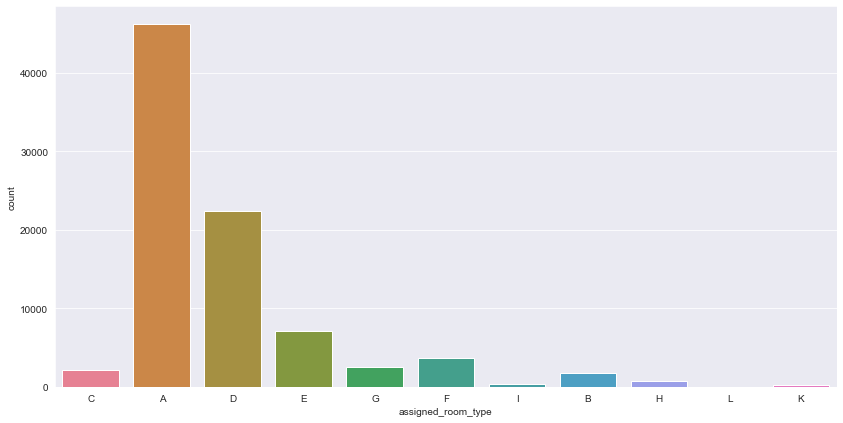

In [68]:
plt.figure(figsize=(14,7))
sns.countplot(df['assigned_room_type'], palette='husl')
plt.show()

### Booking Changes
Number of changes/amendments made to the booking from the moment the booking was entered  until the moment of check-in or cancellation

In [69]:
df.booking_changes.value_counts(normalize=True)

0     0.819012
1     0.124596
2     0.039831
3     0.009860
4     0.003965
5     0.001287
6     0.000621
7     0.000333
8     0.000161
9     0.000092
10    0.000057
13    0.000046
14    0.000034
15    0.000034
16    0.000023
11    0.000011
12    0.000011
17    0.000011
18    0.000011
Name: booking_changes, dtype: float64

K:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


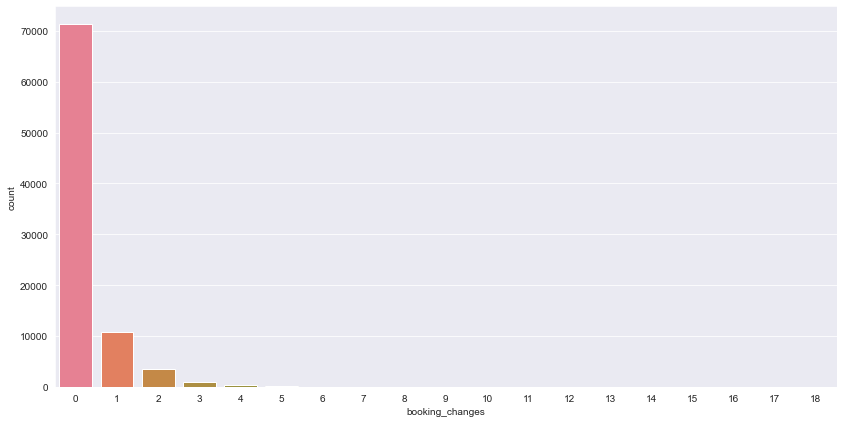

In [70]:
plt.figure(figsize=(14,7))
sns.countplot(df['booking_changes'], palette='husl')
plt.show()

### Distribution Channel
Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

In [71]:
df.distribution_channel.value_counts(normalize=True)

TA/TO        0.791248
Direct       0.148592
Corporate    0.058035
GDS          0.002069
Undefined    0.000057
Name: distribution_channel, dtype: float64

K:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


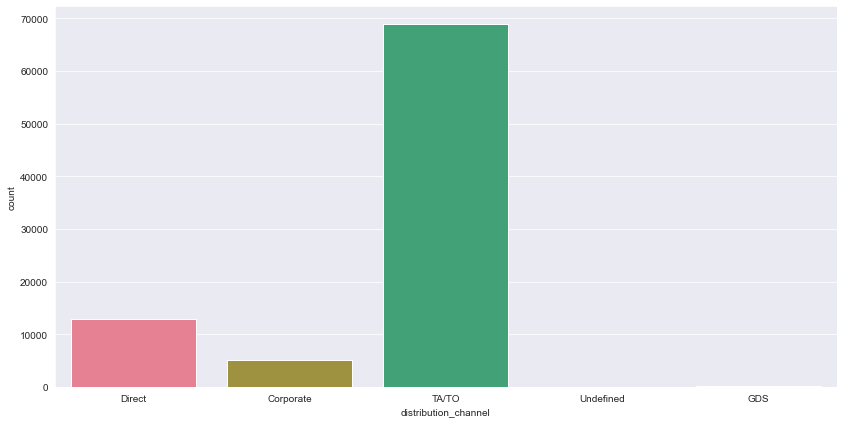

In [72]:
plt.figure(figsize=(14,7))
sns.countplot(df['distribution_channel'], palette='husl')
plt.show()

Majority of the distribution channels and market segments involve travel agencies (online or offline).
We can target our marketing area to be on these travel agencies website and work with them since majority of the visitors tend to reach out to them

### Repeated Guest

Check if the booking name was from a repeated guest (1) or not (0)

In [73]:
df.is_repeated_guest.value_counts(normalize=True)

0    0.961398
1    0.038602
Name: is_repeated_guest, dtype: float64

K:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


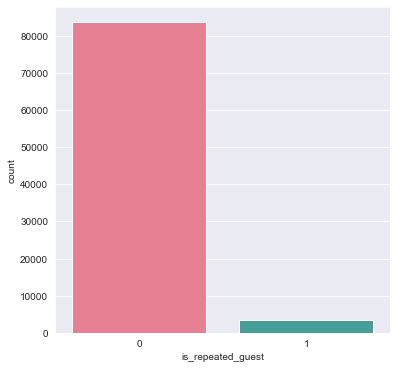

In [74]:
plt.figure(figsize=(6,6))
sns.countplot(df['is_repeated_guest'], palette='husl')
plt.show()

Low number of repeated guests.
A need to target repeated guests since they have booked before.

### Deposit Type

Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:
No Deposit — no deposit was made;
Non Refund — a deposit was made in the value of the total stay cost;
Refundable — a deposit was made with a value under the total cost of stay.

In [75]:
df.deposit_type.value_counts(normalize=True)

No Deposit    0.986876
Non Refund    0.011894
Refundable    0.001230
Name: deposit_type, dtype: float64

K:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


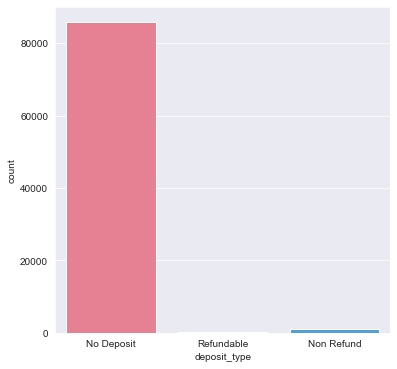

In [76]:
plt.figure(figsize=(6,6))
sns.countplot(df['deposit_type'], palette='husl')
plt.show()


Majority of the booking does not require deposit. That could explain why cancellation rate was actually 50% of non-cancellation rate.

### Required Car Parking Spaces

Number of car parking spaces required by the customer.


In [77]:
df.required_car_parking_spaces.value_counts(normalize=True)

0    0.916120
1    0.083524
2    0.000299
3    0.000034
8    0.000023
Name: required_car_parking_spaces, dtype: float64

K:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


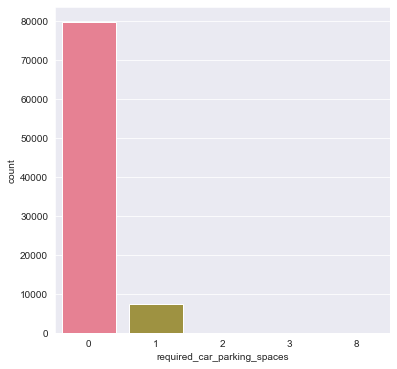

In [78]:
plt.figure(figsize=(6,6))
sns.countplot(df['required_car_parking_spaces'], palette='husl')
plt.show()

### Reservation Status

Reservation last status, assuming one of three categories:
Canceled — booking was canceled by the customer;
Check-Out — customer has checked in but already departed;
No-Show — customer did not check-in and did inform the hotel of the reason why

In [79]:
df.reservation_status.value_counts(normalize=True)

Check-Out    0.725364
Canceled     0.263155
No-Show      0.011481
Name: reservation_status, dtype: float64

K:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


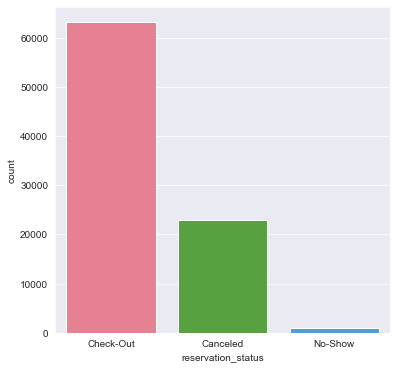

In [80]:
plt.figure(figsize=(6,6))
sns.countplot(df['reservation_status'], palette='husl')
plt.show()

### Hotel Type

Lets see the proportion of reservations between hotel types.

In [81]:
df.hotel.value_counts(normalize=True)

City Hotel      0.611386
Resort Hotel    0.388614
Name: hotel, dtype: float64

K:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


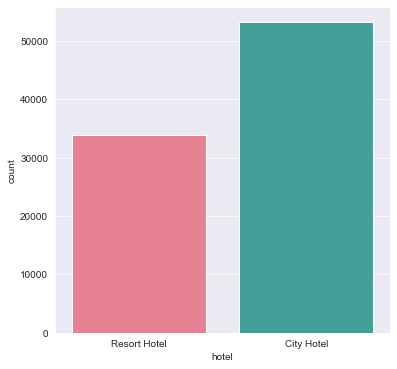

In [82]:
plt.figure(figsize=(6,6))
sns.countplot(df['hotel'], palette='husl')
plt.show()

### Relation between prices and month

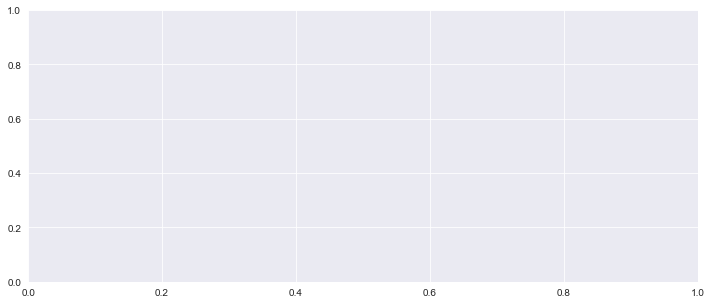

In [83]:
plt.figure(figsize=(12,5))

# Calculating average daily rate per person
df['adr_pp'] = df['adr'] / (df['adults'] + df['children']) 
actual_guests = df.loc[df["is_canceled"] == '0']
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel')
plt.show()

<AxesSubplot:>

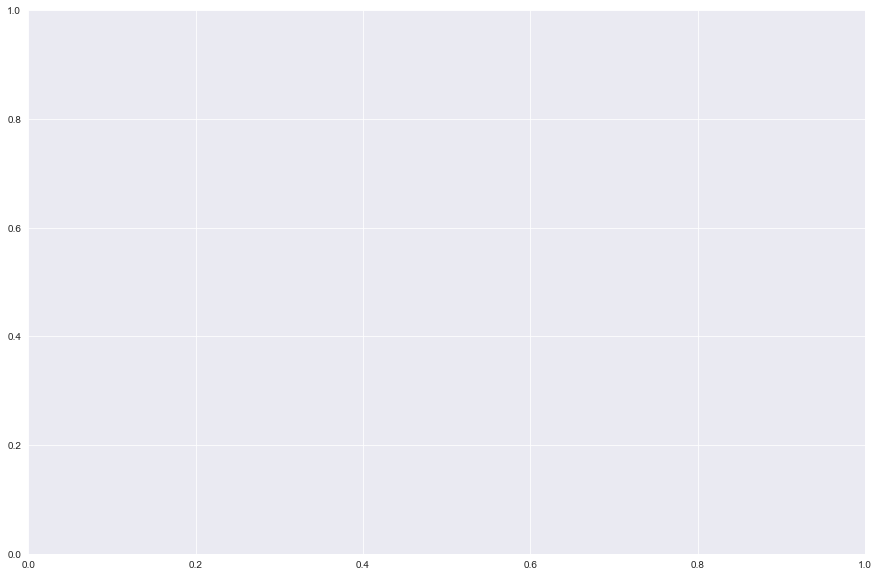

In [84]:
# Resizing plot 
plt.figure(figsize=(15,10))

# Calculating average daily rate per person
data['adr_pp'] = data['adr'] / (data['adults'] + data['children']) 
actual_guests = data.loc[data["is_canceled"] == 'not_canceled']
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel')

### Average Daily Rate (ADR)

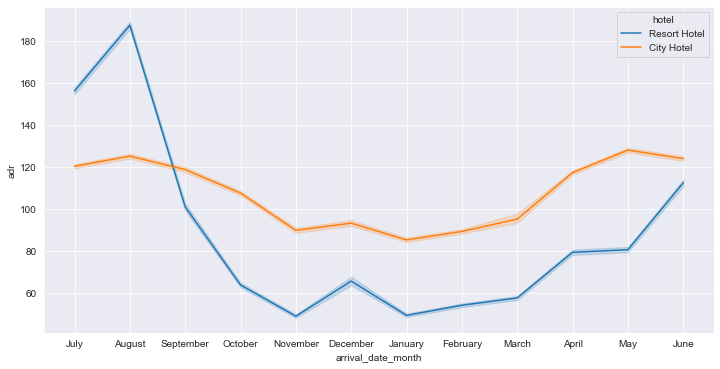

In [85]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df)
plt.show()

For resort hotels, the average daily rate is more expensive during august, july and september.
For city hotels, the average daily rate is more expensive during august, july, june and may.
Prices of resort hotel are much higher. It seems that is definitely the case since resort hotels specialise in that.
Prices of city hotel do not fluctuate that much.

### Asking and Answering Questions
Now we will ask and answer some interesting questions about the data.
1)Which are the three most common and uncommon countries of origin?

In [86]:
print('Most common countries:')
print(df.country.value_counts().head(3))
print('-'*50)
print('\n Most uncommon countries:')
print(df.country.value_counts().tail(35))

Most common countries:
PRT    27283
GBR    10391
FRA     8813
Name: country, dtype: int64
--------------------------------------------------

 Most uncommon countries:
MYT    2
GGY    2
MWI    2
MRT    1
NCL    1
NIC    1
BHS    1
MLI    1
SDN    1
NAM    1
PYF    1
LCA    1
MDG    1
FJI    1
UMI    1
ATF    1
CYM    1
MMR    1
GLP    1
BDI    1
BFA    1
KHM    1
DMA    1
GUY    1
SLE    1
ASM    1
HND    1
KIR    1
AIA    1
NPL    1
SMR    1
DJI    1
BWA    1
VGB    1
PLW    1
Name: country, dtype: int64


As we can see, Portugal tops the list with 48377 of the cases, followed by Great Britain with 12087 and France with 10391.
There are 30 countries that can be considered as the most uncommon country of origin, with 1 guest per country. Among these, we have Madagascar, Dominica, Mali, Guyana, Palau, Kiribati, Sudan, etc.

2)Which are the months of highest and least occupation?


In [87]:
df.arrival_date_month.value_counts(normalize=True)

August       0.129101
July         0.115299
May          0.095843
April        0.090729
June         0.089063
March        0.085673
October      0.079398
September    0.076686
February     0.069354
December     0.058563
November     0.056931
January      0.053357
Name: arrival_date_month, dtype: float64

The month of highest occupation is august with 11.65% of the reservations. The month of lest occupation is january with 4.94% of the reservations.

3. What is the most popular meal package?


In [88]:
df.meal.value_counts(normalize=True)

BB           0.778928
SC           0.107623
HB           0.103727
Undefined    0.005585
FB           0.004137
Name: meal, dtype: float64

The Bed & Breakfast option is the most popular, with a frequency of 77.42%.

4. Which is the most reserved room type?

In [89]:
df.reserved_room_type.value_counts(normalize=True)

A    0.647299
D    0.199099
E    0.068883
F    0.032350
G    0.023501
B    0.011446
C    0.010504
H    0.006849
L    0.000069
Name: reserved_room_type, dtype: float64

The “A” room type is the most popular among the clients, with 72.06% of the reservations.

5. How many bookings changes have been done during the studied period?

In [90]:
df.booking_changes.sum()

23278

There were 25935 registered changes in the bookings during this period.

6. How many people have been registered in the hotel?

7. How many car parking spaces have been used?


In [91]:
df.required_car_parking_spaces.sum()

7345

7448 car parking spaces have been used.

What is the most common customer type?

In [92]:
df.customer_type.value_counts(normalize=True)

Transient          0.823805
Transient-Party    0.134112
Contract           0.035867
Group              0.006217
Name: customer_type, dtype: float64

Trasients are the most common customer type, they represent 75% of the total customers.

## Inferences and Conclusion

* The majority of guests come from western europe countries.We should spend a significant amount of our budget on those area.
* the majority of reservations are for city hotels.Definitely need to spend the most targeting fund on those hotel.
* The number of repeated guests is too low. we should target our advertisement on guests to increase returning guests.
* The majority of reservations converts into successful transactions.
* We also realise that the high rate of cancellations can be due high no deposit policies.
* We should also target months between May to Aug. Those are peak months due to the summer period.


### Analysing prices of hotel across year for Resort Hotel and City Hotel

(how much price varies over year?)

In [93]:
data_resort = df[(df['hotel']=='Resort Hotel') & (df['is_canceled']==0)]
data_city = df[(df['hotel']=='City Hotel') & (df['is_canceled']==0)]

In [94]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_pp
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,49.0


In [95]:
resort_hotel_df = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel_df

,arrival_date_month,adr
0,April,76.886593
1,August,182.144053
2,December,64.125667
3,February,53.586649
4,January,48.643783
5,July,150.992868
6,June,109.033103
7,March,57.143263
8,May,77.727402
9,November,48.945365


In [96]:
city_hotel_df = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel_df

,arrival_date_month,adr
0,April,114.251636
1,August,122.829156
2,December,90.769559
3,February,88.200344
4,January,83.380235
5,July,120.100814
6,June,120.673753
7,March,91.311448
8,May,124.825944
9,November,88.268915


In [97]:
# merge both data 
final_df = resort_hotel_df.merge(city_hotel_df, on='arrival_date_month')
final_df.columns=['month', 'price_for_resort_hotel', 'price_for_city_hotel'] # rename columns
final_df

,month,price_for_resort_hotel,price_for_city_hotel
0,April,76.886593,114.251636
1,August,182.144053,122.829156
2,December,64.125667,90.769559
3,February,53.586649,88.200344
4,January,48.643783,83.380235
5,July,150.992868,120.100814
6,June,109.033103,120.673753
7,March,57.143263,91.311448
8,May,77.727402,124.825944
9,November,48.945365,88.268915


In [98]:
# python modules for sorting the month, weekday etc
!pip install sort_dataframeby_monthorweek
!pip install sorted-months-weekdays

In [99]:
import sort_dataframeby_monthorweek as sd

def sort_data(df, column):
    return sd.Sort_Dataframeby_Month(df, column)

In [100]:
final_df = sort_data(final_df, 'month')
final_df

,month,price_for_resort_hotel,price_for_city_hotel
0,January,48.643783,83.380235
1,February,53.586649,88.200344
2,March,57.143263,91.311448
3,April,76.886593,114.251636
4,May,77.727402,124.825944
5,June,109.033103,120.673753
6,July,150.992868,120.100814
7,August,182.144053,122.829156
8,September,98.961061,116.973279
9,October,62.656777,105.499821


In [101]:
final_df.columns

Index(['month', 'price_for_resort_hotel', 'price_for_city_hotel'], dtype='object')

## Feature Selection and Feature Engineering

In [102]:

## Copy the dataframe
df_subset = df.copy()

We have two features in our dataset reserved_room_type and another is assigned_room_type. We will make the new feature let’s call it Room which will contain 1 if the guest was assigned the same room that was reserved else 0. Guest can cancel the booking if he did not get the same room. 

In [103]:
## Make the new column which contain 1 if guest received the same room which was reserved otherwise 0
df_subset['Room'] = 0
df_subset.loc[ df_subset['reserved_room_type'] == df_subset['assigned_room_type'] , 'Room'] = 1

Another feature will be net_cancelled. It will contain 1 If the current customer has canceled more bookings in the past than the number of bookings he did not cancel, else 0.

In [104]:
## Make the new column which contain 1 if the guest has cancelled more booking in the past
## than the number of booking he did not cancel, otherwise 0

df_subset['net_cancelled'] = 0
df_subset.loc[ df_subset['previous_cancellations'] > df_subset['previous_bookings_not_canceled'] , 'net_cancelled'] = 1


In [105]:
## Remove the less important features
df_subset = df_subset.drop(['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month',
                            'arrival_date_month','assigned_room_type','reserved_room_type','reservation_status_date',
                            'previous_cancellations','previous_bookings_not_canceled'],axis=1)


Let’s also remove the reservation_status. Even though it is a very important feature, but it already has information about canceled booking. Further, It can only have information after the booking was canceled or the guest checked in. So it will not be useful to use this feature in our predictive model. Because for the future prediction we won’t have information about the reservation status.

In [106]:
## Remove reservation_status column
## because it tells us if booking was cancelled 
df_subset = df_subset.drop(['reservation_status'], axis=1)

Let’s plot the heatmap and see the correlation


In [107]:
df_subset.corr()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,adr_pp,Room,net_cancelled
is_canceled,1.000000,0.185263,0.056437,0.081793,0.081046,0.067082,-0.020538,-0.088948,-0.093156,-0.001069,-0.075045,0.004847,0.127859,-0.184351,-0.120378,0.051831,0.212936,0.171748
lead_time,0.185263,1.000000,0.244022,0.334313,0.138981,0.028627,-0.003628,-0.145744,0.081445,0.079295,-0.078670,0.132227,0.022967,-0.086779,0.034058,-0.084088,0.105614,0.075643
stays_in_weekend_nights,0.056437,0.244022,1.000000,0.487108,0.100403,0.032778,0.016088,-0.110535,0.024640,0.163509,-0.096572,-0.032795,0.053043,-0.042873,0.036332,-0.036704,0.118341,0.002529
stays_in_week_nights,0.081793,0.334313,0.487108,1.000000,0.113265,0.036676,0.019639,-0.120501,0.057537,0.202474,-0.072891,0.003181,0.073604,-0.045209,0.043957,-0.032959,0.131020,0.006016
adults,0.081046,0.138981,0.100403,0.113265,1.000000,0.021999,0.016197,-0.166580,-0.036205,0.027341,-0.174614,-0.014917,0.242099,0.007056,0.112759,-0.257109,0.065852,-0.015316
children,0.067082,0.028627,0.032778,0.036676,0.021999,1.000000,0.017354,-0.045226,0.034080,0.042165,-0.051037,-0.020400,0.326207,0.036348,0.044563,-0.095299,0.034208,-0.016151
babies,-0.020538,-0.003628,0.016088,0.019639,0.016197,0.017354,1.000000,-0.012847,0.084320,0.029051,-0.011420,-0.006839,0.023090,0.030868,0.094928,-0.001623,-0.013619,-0.003478
is_repeated_guest,-0.088948,-0.145744,-0.110535,-0.120501,-0.166580,-0.045226,-0.012847,1.000000,0.006974,-0.064110,0.200840,-0.012664,-0.149729,0.073149,-0.001416,-0.031718,-0.083844,0.053150
booking_changes,-0.093156,0.081445,0.024640,0.057537,-0.036205,0.034080,0.084320,0.006974,1.000000,0.024115,0.087546,0.024305,0.012167,0.051380,0.018745,0.030920,-0.066573,-0.025530
agent,-0.001069,0.079295,0.163509,0.202474,0.027341,0.042165,0.029051,-0.064110,0.024115,1.000000,-0.128892,-0.015917,0.008518,0.122445,0.033453,-0.053006,-0.029899,-0.026104


eg. "is_canceled" and "lead_time" have a correlation of 0.29, i.e., if lead_time value increases, there is a probability of 29% that is_canceled also increases.

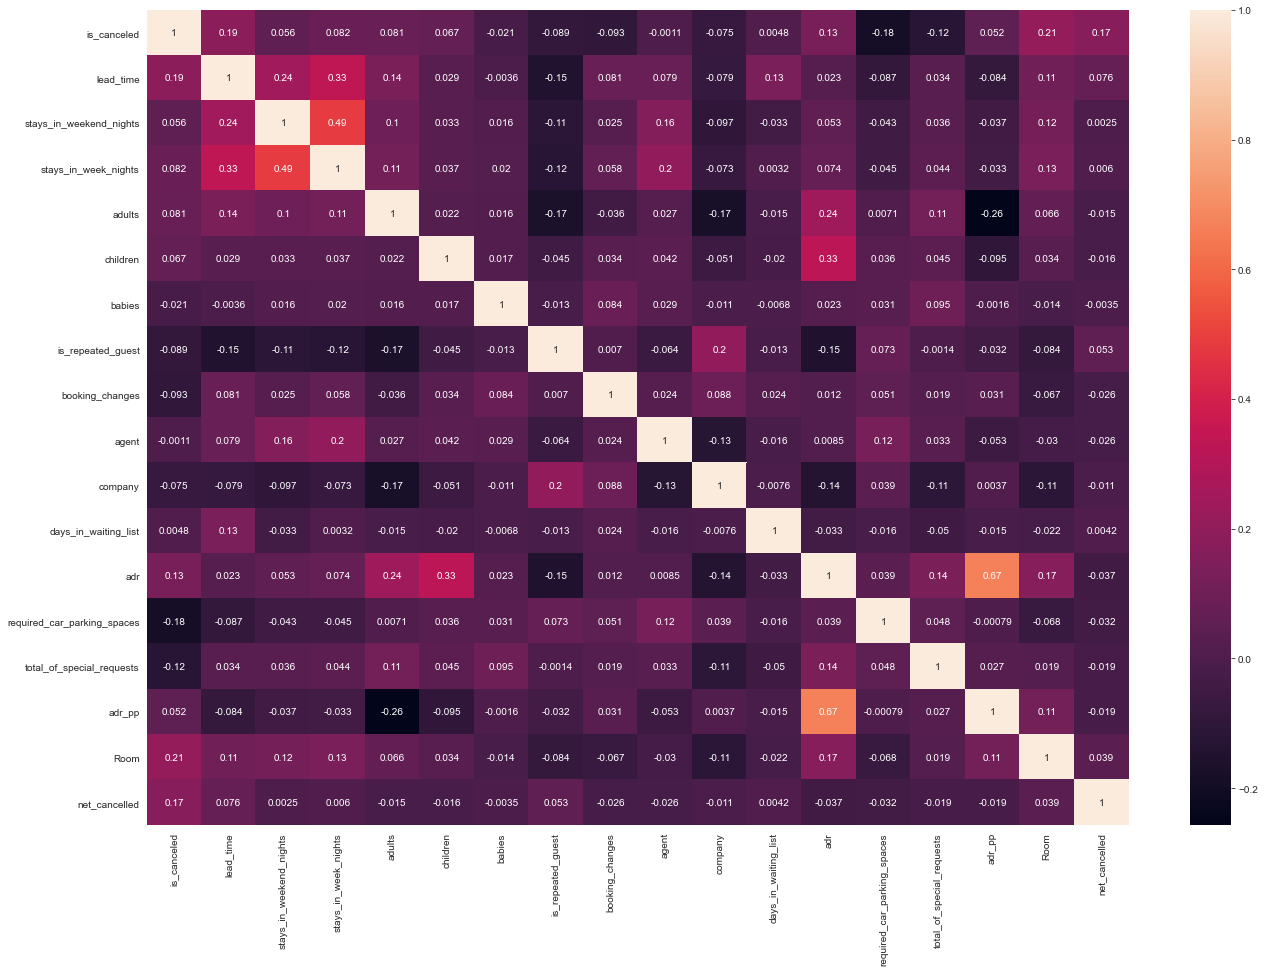

In [108]:
## Plot the heatmap to see correlation with columns
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(df_subset.corr(), annot=True, ax=ax);

We can see our new features, Room and net_cancelled have a higher correlation with is_cancelled than most of the other columns.


In [109]:
# find the correlation with "is_canceled" because it is depended feature 
# (how all other variable are going to be depended on is_canceled?)

correlation = df_subset.corr()['is_canceled']
correlation

is_canceled                    1.000000
lead_time                      0.185263
stays_in_weekend_nights        0.056437
stays_in_week_nights           0.081793
adults                         0.081046
children                       0.067082
babies                        -0.020538
is_repeated_guest             -0.088948
booking_changes               -0.093156
agent                         -0.001069
company                       -0.075045
days_in_waiting_list           0.004847
adr                            0.127859
required_car_parking_spaces   -0.184351
total_of_special_requests     -0.120378
adr_pp                         0.051831
Room                           0.212936
net_cancelled                  0.171748
Name: is_canceled, dtype: float64

In [110]:
correlation.abs().sort_values(ascending=False)

is_canceled                    1.000000
Room                           0.212936
lead_time                      0.185263
required_car_parking_spaces    0.184351
net_cancelled                  0.171748
adr                            0.127859
total_of_special_requests      0.120378
booking_changes                0.093156
is_repeated_guest              0.088948
stays_in_week_nights           0.081793
adults                         0.081046
company                        0.075045
children                       0.067082
stays_in_weekend_nights        0.056437
adr_pp                         0.051831
babies                         0.020538
days_in_waiting_list           0.004847
agent                          0.001069
Name: is_canceled, dtype: float64

In [111]:
df_subset.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,adr_pp,Room,net_cancelled
0,Resort Hotel,0,342,0,0,2,0,0,BB,PRT,Direct,Direct,0,3,No Deposit,0,0,0,Transient,0.0,0,0,0.0,1,0
1,Resort Hotel,0,737,0,0,2,0,0,BB,PRT,Direct,Direct,0,4,No Deposit,0,0,0,Transient,0.0,0,0,0.0,1,0
2,Resort Hotel,0,7,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,No Deposit,0,0,0,Transient,75.0,0,0,75.0,0,0
3,Resort Hotel,0,13,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,No Deposit,304,0,0,Transient,75.0,0,0,75.0,1,0
4,Resort Hotel,0,14,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,No Deposit,240,0,0,Transient,98.0,0,1,49.0,1,0


In [112]:
df_subset.shape

(87017, 25)

In [113]:
df_subset.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,adr_pp,Room,net_cancelled
0,Resort Hotel,0,342,0,0,2,0,0,BB,PRT,Direct,Direct,0,3,No Deposit,0,0,0,Transient,0.0,0,0,0.0,1,0
1,Resort Hotel,0,737,0,0,2,0,0,BB,PRT,Direct,Direct,0,4,No Deposit,0,0,0,Transient,0.0,0,0,0.0,1,0
2,Resort Hotel,0,7,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,No Deposit,0,0,0,Transient,75.0,0,0,75.0,0,0
3,Resort Hotel,0,13,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,No Deposit,304,0,0,Transient,75.0,0,0,75.0,1,0
4,Resort Hotel,0,14,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,No Deposit,240,0,0,Transient,98.0,0,1,49.0,1,0


In [114]:
df_subset['meal'].value_counts()

BB           67780
SC            9365
HB            9026
Undefined      486
FB             360
Name: meal, dtype: int64

In [115]:
def meal_transform(meal):
    if meal == 'BB':
        return 1
    elif meal == 'HB':
        return 2
    elif meal == 'SC':
        return 3
    elif meal == 'FB':
        return 4
    else:
        return 0

In [116]:
df_subset['New_meal'] = df_subset['meal'].apply(meal_transform)

In [117]:
df_subset.head(50)

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,adr_pp,Room,net_cancelled,New_meal
0,Resort Hotel,0,342,0,0,2,0,0,BB,PRT,Direct,Direct,0,3,No Deposit,0,0,0,Transient,0.00,0,0,0.000000,1,0,1
1,Resort Hotel,0,737,0,0,2,0,0,BB,PRT,Direct,Direct,0,4,No Deposit,0,0,0,Transient,0.00,0,0,0.000000,1,0,1
2,Resort Hotel,0,7,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,No Deposit,0,0,0,Transient,75.00,0,0,75.000000,0,0,1
3,Resort Hotel,0,13,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,No Deposit,304,0,0,Transient,75.00,0,0,75.000000,1,0,1
4,Resort Hotel,0,14,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,No Deposit,240,0,0,Transient,98.00,0,1,49.000000,1,0,1
6,Resort Hotel,0,0,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,No Deposit,0,0,0,Transient,107.00,0,0,53.500000,1,0,1
7,Resort Hotel,0,9,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,No Deposit,303,0,0,Transient,103.00,0,1,51.500000,1,0,4
8,Resort Hotel,1,85,0,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,No Deposit,240,0,0,Transient,82.00,0,1,41.000000,1,0,1
9,Resort Hotel,1,75,0,3,2,0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,No Deposit,15,0,0,Transient,105.50,0,0,52.750000,1,0,2
10,Resort Hotel,1,23,0,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,No Deposit,240,0,0,Transient,123.00,0,0,61.500000,1,0,1


In [118]:
df_subset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'adr_pp',
       'Room', 'net_cancelled', 'New_meal'],
      dtype='object')

In [119]:
df_subset['market_segment'].value_counts()

Online TA        51446
Offline TA/TO    13799
Direct           11757
Groups            4905
Corporate         4191
Complementary      691
Aviation           226
Undefined            2
Name: market_segment, dtype: int64

In [120]:
def market_transform(market_segment):
    if market_segment == 'Online TA':
        return 1
    elif market_segment == 'Offline TA/TO':
        return 2
    elif market_segment == 'Groups':
        return 3
    elif market_segment == 'Direct':
        return 4
    elif market_segment == 'Corporate':
        return 5
    elif market_segment == 'Complementary':
        return 6
    elif market_segment == 'Aviation':
        return 7
    else:
        return 0
    

In [121]:
df_subset['New_market_segment'] = df_subset['market_segment'].apply(market_transform)

In [122]:
df_subset.head(5)

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,adr_pp,Room,net_cancelled,New_meal,New_market_segment
0,Resort Hotel,0,342,0,0,2,0,0,BB,PRT,Direct,Direct,0,3,No Deposit,0,0,0,Transient,0.0,0,0,0.0,1,0,1,4
1,Resort Hotel,0,737,0,0,2,0,0,BB,PRT,Direct,Direct,0,4,No Deposit,0,0,0,Transient,0.0,0,0,0.0,1,0,1,4
2,Resort Hotel,0,7,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,No Deposit,0,0,0,Transient,75.0,0,0,75.0,0,0,1,4
3,Resort Hotel,0,13,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,No Deposit,304,0,0,Transient,75.0,0,0,75.0,1,0,1,5
4,Resort Hotel,0,14,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,No Deposit,240,0,0,Transient,98.0,0,1,49.0,1,0,1,1


In [123]:
# distribution_channel

In [124]:
df_subset['distribution_channel'].value_counts()

TA/TO        68852
Direct       12930
Corporate     5050
GDS            180
Undefined        5
Name: distribution_channel, dtype: int64

In [125]:
def distribution_transform(distribution_channel):
    if distribution_channel == 'TA/TO':
        return 1
    elif distribution_channel == 'Direct':
        return 2
    elif distribution_channel == 'Corporate':
        return 3
    elif distribution_channel == 'GDS':
        return 4
    else:
        return 0

In [126]:
df_subset['New_distribution_channel'] = df_subset['distribution_channel'].apply(distribution_transform)

In [127]:
df_subset.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,adr_pp,Room,net_cancelled,New_meal,New_market_segment,New_distribution_channel
0,Resort Hotel,0,342,0,0,2,0,0,BB,PRT,Direct,Direct,0,3,No Deposit,0,0,0,Transient,0.0,0,0,0.0,1,0,1,4,2
1,Resort Hotel,0,737,0,0,2,0,0,BB,PRT,Direct,Direct,0,4,No Deposit,0,0,0,Transient,0.0,0,0,0.0,1,0,1,4,2
2,Resort Hotel,0,7,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,No Deposit,0,0,0,Transient,75.0,0,0,75.0,0,0,1,4,2
3,Resort Hotel,0,13,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,No Deposit,304,0,0,Transient,75.0,0,0,75.0,1,0,1,5,3
4,Resort Hotel,0,14,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,No Deposit,240,0,0,Transient,98.0,0,1,49.0,1,0,1,1,1


In [128]:
df_subset['deposit_type'].value_counts()

No Deposit    85875
Non Refund     1035
Refundable      107
Name: deposit_type, dtype: int64

In [129]:
def deposit_transform(deposit_type):
    if deposit_type == 'No Deposit':
        return 1
    elif deposit_type == 'Non Refund':
        return 2
    else:
        return 3

In [130]:
df_subset['New_deposit_type'] = df_subset['deposit_type'].apply(deposit_transform)

In [131]:
df_subset.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,adr_pp,Room,net_cancelled,New_meal,New_market_segment,New_distribution_channel,New_deposit_type
0,Resort Hotel,0,342,0,0,2,0,0,BB,PRT,Direct,Direct,0,3,No Deposit,0,0,0,Transient,0.0,0,0,0.0,1,0,1,4,2,1
1,Resort Hotel,0,737,0,0,2,0,0,BB,PRT,Direct,Direct,0,4,No Deposit,0,0,0,Transient,0.0,0,0,0.0,1,0,1,4,2,1
2,Resort Hotel,0,7,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,No Deposit,0,0,0,Transient,75.0,0,0,75.0,0,0,1,4,2,1
3,Resort Hotel,0,13,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,No Deposit,304,0,0,Transient,75.0,0,0,75.0,1,0,1,5,3,1
4,Resort Hotel,0,14,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,No Deposit,240,0,0,Transient,98.0,0,1,49.0,1,0,1,1,1,1


In [132]:
df_subset['customer_type'].value_counts()

Transient          71685
Transient-Party    11670
Contract            3121
Group                541
Name: customer_type, dtype: int64

In [133]:
def customer_transform(customer_type):
    if customer_type == 'Transient':
        return 1
    elif customer_type == 'Transient-Party':
        return 2
    elif customer_type == 'Contract':
        return 3
    else:
        return 4

In [134]:
df_subset['New_customer_type'] = df_subset['customer_type'].apply(customer_transform)

In [135]:
df_subset.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,adr_pp,Room,net_cancelled,New_meal,New_market_segment,New_distribution_channel,New_deposit_type,New_customer_type
0,Resort Hotel,0,342,0,0,2,0,0,BB,PRT,Direct,Direct,0,3,No Deposit,0,0,0,Transient,0.0,0,0,0.0,1,0,1,4,2,1,1
1,Resort Hotel,0,737,0,0,2,0,0,BB,PRT,Direct,Direct,0,4,No Deposit,0,0,0,Transient,0.0,0,0,0.0,1,0,1,4,2,1,1
2,Resort Hotel,0,7,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,No Deposit,0,0,0,Transient,75.0,0,0,75.0,0,0,1,4,2,1,1
3,Resort Hotel,0,13,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,No Deposit,304,0,0,Transient,75.0,0,0,75.0,1,0,1,5,3,1,1
4,Resort Hotel,0,14,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,No Deposit,240,0,0,Transient,98.0,0,1,49.0,1,0,1,1,1,1,1


In [136]:
df_subset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'adr_pp',
       'Room', 'net_cancelled', 'New_meal', 'New_market_segment',
       'New_distribution_channel', 'New_deposit_type', 'New_customer_type'],
      dtype='object')

In [137]:
data3 = df_subset.copy()

In [138]:
data3.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,adr_pp,Room,net_cancelled,New_meal,New_market_segment,New_distribution_channel,New_deposit_type,New_customer_type
0,Resort Hotel,0,342,0,0,2,0,0,BB,PRT,Direct,Direct,0,3,No Deposit,0,0,0,Transient,0.0,0,0,0.0,1,0,1,4,2,1,1
1,Resort Hotel,0,737,0,0,2,0,0,BB,PRT,Direct,Direct,0,4,No Deposit,0,0,0,Transient,0.0,0,0,0.0,1,0,1,4,2,1,1
2,Resort Hotel,0,7,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,No Deposit,0,0,0,Transient,75.0,0,0,75.0,0,0,1,4,2,1,1
3,Resort Hotel,0,13,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,No Deposit,304,0,0,Transient,75.0,0,0,75.0,1,0,1,5,3,1,1
4,Resort Hotel,0,14,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,No Deposit,240,0,0,Transient,98.0,0,1,49.0,1,0,1,1,1,1,1


In [139]:
data3.drop(['meal','market_segment','distribution_channel','deposit_type','customer_type'],axis='columns',inplace=True)

In [140]:
data3.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,adr_pp,Room,net_cancelled,New_meal,New_market_segment,New_distribution_channel,New_deposit_type,New_customer_type
0,Resort Hotel,0,342,0,0,2,0,0,PRT,0,3,0,0,0,0.0,0,0,0.0,1,0,1,4,2,1,1
1,Resort Hotel,0,737,0,0,2,0,0,PRT,0,4,0,0,0,0.0,0,0,0.0,1,0,1,4,2,1,1
2,Resort Hotel,0,7,0,1,1,0,0,GBR,0,0,0,0,0,75.0,0,0,75.0,0,0,1,4,2,1,1
3,Resort Hotel,0,13,0,1,1,0,0,GBR,0,0,304,0,0,75.0,0,0,75.0,1,0,1,5,3,1,1
4,Resort Hotel,0,14,0,2,2,0,0,GBR,0,0,240,0,0,98.0,0,1,49.0,1,0,1,1,1,1,1


In [141]:
data3.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'country',
       'is_repeated_guest', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'adr_pp', 'Room', 'net_cancelled',
       'New_meal', 'New_market_segment', 'New_distribution_channel',
       'New_deposit_type', 'New_customer_type'],
      dtype='object')

In [142]:
data3['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', '0    PRT', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'K

In [143]:
data3.rename(columns = {'New_meal':'meal','New_market_segment':'market_segment','New_distribution_channel':'distribution_channel','New_deposit_type':'deposit_type','New_customer_type':'customer_type'})

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,adr_pp,Room,net_cancelled,meal,market_segment,distribution_channel,deposit_type,customer_type
0,Resort Hotel,0,342,0,0,2,0,0,PRT,0,3,0,0,0,0.00,0,0,0.000000,1,0,1,4,2,1,1
1,Resort Hotel,0,737,0,0,2,0,0,PRT,0,4,0,0,0,0.00,0,0,0.000000,1,0,1,4,2,1,1
2,Resort Hotel,0,7,0,1,1,0,0,GBR,0,0,0,0,0,75.00,0,0,75.000000,0,0,1,4,2,1,1
3,Resort Hotel,0,13,0,1,1,0,0,GBR,0,0,304,0,0,75.00,0,0,75.000000,1,0,1,5,3,1,1
4,Resort Hotel,0,14,0,2,2,0,0,GBR,0,0,240,0,0,98.00,0,1,49.000000,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2,5,2,0,0,BEL,0,0,394,0,0,96.14,0,0,48.070000,1,0,1,2,1,1,1
119386,City Hotel,0,102,2,5,3,0,0,FRA,0,0,9,0,0,225.43,0,2,75.143333,1,0,1,1,1,1,1
119387,City Hotel,0,34,2,5,2,0,0,DEU,0,0,9,0,0,157.71,0,4,78.855000,1,0,1,1,1,1,1
119388,City Hotel,0,109,2,5,2,0,0,GBR,0,0,89,0,0,104.40,0,0,52.200000,1,0,1,1,1,1,1


In [144]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [145]:
data3['country']= label_encoder.fit_transform(data3['country'])

In [146]:
data3.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,adr_pp,Room,net_cancelled,New_meal,New_market_segment,New_distribution_channel,New_deposit_type,New_customer_type
0,Resort Hotel,0,342,0,0,2,0,0,136,0,3,0,0,0,0.0,0,0,0.0,1,0,1,4,2,1,1
1,Resort Hotel,0,737,0,0,2,0,0,136,0,4,0,0,0,0.0,0,0,0.0,1,0,1,4,2,1,1
2,Resort Hotel,0,7,0,1,1,0,0,60,0,0,0,0,0,75.0,0,0,75.0,0,0,1,4,2,1,1
3,Resort Hotel,0,13,0,1,1,0,0,60,0,0,304,0,0,75.0,0,0,75.0,1,0,1,5,3,1,1
4,Resort Hotel,0,14,0,2,2,0,0,60,0,0,240,0,0,98.0,0,1,49.0,1,0,1,1,1,1,1


In [147]:
data4 = data3.rename(columns = {'New_meal':'meal','New_market_segment':'market_segment','New_distribution_channel':'distribution_channel','New_deposit_type':'deposit_type','New_customer_type':'customer_type'})

In [148]:
data4.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,adr_pp,Room,net_cancelled,meal,market_segment,distribution_channel,deposit_type,customer_type
0,Resort Hotel,0,342,0,0,2,0,0,136,0,3,0,0,0,0.0,0,0,0.0,1,0,1,4,2,1,1
1,Resort Hotel,0,737,0,0,2,0,0,136,0,4,0,0,0,0.0,0,0,0.0,1,0,1,4,2,1,1
2,Resort Hotel,0,7,0,1,1,0,0,60,0,0,0,0,0,75.0,0,0,75.0,0,0,1,4,2,1,1
3,Resort Hotel,0,13,0,1,1,0,0,60,0,0,304,0,0,75.0,0,0,75.0,1,0,1,5,3,1,1
4,Resort Hotel,0,14,0,2,2,0,0,60,0,0,240,0,0,98.0,0,1,49.0,1,0,1,1,1,1,1


In [149]:
data4['hotel']= label_encoder.fit_transform(data4['hotel']) 

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [151]:
x = data4.drop(['is_canceled'],axis=1)

In [162]:
x.head()

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,adr_pp,Room,net_cancelled,meal,market_segment,distribution_channel,deposit_type,customer_type
0,1,342,0,0,2,0,0,136,0,3,0,0,0,0.0,0,0,0.0,1,0,1,4,2,1,1
1,1,737,0,0,2,0,0,136,0,4,0,0,0,0.0,0,0,0.0,1,0,1,4,2,1,1
2,1,7,0,1,1,0,0,60,0,0,0,0,0,75.0,0,0,75.0,0,0,1,4,2,1,1
3,1,13,0,1,1,0,0,60,0,0,304,0,0,75.0,0,0,75.0,1,0,1,5,3,1,1
4,1,14,0,2,2,0,0,60,0,0,240,0,0,98.0,0,1,49.0,1,0,1,1,1,1,1


In [163]:
x.shape

(87017, 24)

In [153]:
y = data4['is_canceled']

Decision Tree Model Building

In [154]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=40)

In [155]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=10)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [156]:
##tree.plot_tree(model);

In [157]:
pred = model.predict(x_test)
pd.Series(pred).value_counts()

0    19761
1     6345
dtype: int64

In [158]:
pd.crosstab(y_test,pred)

col_0,0,1
is_canceled,,
0,16990,1987
1,2771,4358


In [159]:
np.mean(pred==y_test)

0.81774304757527

In [161]:
#Compresssing the pickle file which has 10 features to build web app
import bz2,pickle
file = bz2.BZ2File('modelfinal.pkl','wb')
pickle.dump(model,file)
file.close()

Random Forest model

In [173]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [174]:
kfold = KFold( n_splits=6, random_state=None)

In [175]:
model2= RandomForestClassifier(n_estimators=100,max_features=3)
results= cross_val_score(model2, x, y.ravel(), cv=kfold)    
print(results.mean())

0.6437363658393584


In [180]:
# accuracy is 64 %

Esemble Methods

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [178]:
estimators = []
model3 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model3))
model4 = DecisionTreeClassifier()
estimators.append(('cart', model4))
model5 = SVC()
estimators.append(('svm', model5))

In [179]:
ensemble = VotingClassifier(estimators)
results2 = cross_val_score(ensemble, x, y, cv=kfold)
print(results2.mean())

K:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
K:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

0.6290962524635063
